# Определение перспективного тарифа для телеком компании

    Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

# Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

# Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение и подготовка данных из файла

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math

In [2]:
pd.options.display.max_columns = None

In [3]:
df_users = pd.read_csv('/datasets/users.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')

### Изучение данных таблицы df_users

In [4]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


    df_users:
    1. user_id изменить тип данных для уменьшения выделяемой памяти.
    2. age изменить тип данных для уменьшения выделяемой памяти.
    3. reg_date изменить тип данных на datetime.
    4. churn_date изменить тип данных на datetime.

In [7]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%dT')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%dT')
df_users  = df_users.astype({'age': 'int8',
'user_id': 'int16'})

In [8]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


In [9]:
df_users['reg_date'].dt.month.value_counts()

4     53
8     50
10    45
7     44
1     43
11    42
5     41
6     40
2     39
12    36
9     35
3     32
Name: reg_date, dtype: int64

### Изучение данных таблицы df_tariffs

In [10]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
df_tariffs['mb_per_month_included'] = df_tariffs['mb_per_month_included']/1024
df_tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
df_tariffs  = df_tariffs.astype({'messages_included': 'int16',
                                 'gb_per_month_included': 'int8',
                                 'minutes_included': 'int16',
                                 'rub_monthly_fee': 'int16',
                                 'rub_per_gb': 'int16',
                                 'rub_per_message': 'int8',
                                 'rub_per_minute': 'int8',
                                })

In [12]:
df_tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [13]:
df_tariffs[df_tariffs['tariff_name'] == 'ultra']['rub_per_gb']

1    150
Name: rub_per_gb, dtype: int16

### Изучение данных таблицы df_calls

In [14]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [15]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [16]:
df_calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


    df_calls:
    1. duration поменять тип данных на int с округлением в большую сторону.
    2. call_date изменить тип данных на datetime.
    3. выделение столбца month для дальнейшег анализа.

In [17]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT')
df_calls['duration'] = df_calls['duration'].apply(math.ceil)
df_calls['month'] = df_calls['call_date'].dt.month
df_calls  = df_calls.astype({'user_id': 'int16',
                            'duration': 'int8',
                            'month': 'int8'})

In [18]:
df_calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


### Изучение данных таблицы df_messages

In [19]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


    df_messages:
    1. message_date изменить тип данных на datetime.
    2. выделение столбца month для дальнейшег анализа.
    3. приведение user_id к нужному типу.

In [20]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%dT')
df_messages['month'] = df_messages['message_date'].dt.month
df_messages  = df_messages.astype({'user_id': 'int16',
                                  'month': 'int8'})

In [21]:
df_messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


### Изучение данных таблицы df_internet

In [22]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


    df_internet:
    1. mb_used заменить на gb_used=mb_used/1024: полученные данные округить в большую сторону.
    2. session_date изменить тип данных на datetime.
    3. удалить продублированный столбец Unnamed: 0.
    4. выделение столбца month для дальнейшег анализа.

In [23]:
df_internet = df_internet.drop('Unnamed: 0', 1)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT')
df_internet['month'] = df_internet['session_date'].dt.month
df_internet  = df_internet.astype({'user_id': 'int16',
                                   'month': 'int8'})

In [24]:
df_internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00
month,149396.0,8.563315,2.788717,1.0,7.0000,9.000,11.0000,12.00


In [25]:
df_internet.head(10)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
5,1000_5,399.97,2018-10-02,1000,10
6,1000_6,540.08,2018-09-07,1000,9
7,1000_7,415.70,2018-07-11,1000,7
8,1000_8,505.40,2018-10-08,1000,10
9,1000_9,345.54,2018-09-03,1000,9


### Вывод

    Данные изучены и приведены короткие пометки по их первичной обработки. Все необходимые действия по предобработки данных проведены.

## Предобработка данных

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [26]:
df_calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


Убираем учет нулевых значений в столбце duration для правильного подсчета count по месяцам.

In [27]:
df_calls['duration'] = df_calls['duration'].replace(0, np.nan)

In [28]:
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'], fill_value=0)
df_calls_pivot.columns = ['calls_duration', 'calls_count']
df_calls_pivot

calls_duration  calls_count
user_id month                             
1000    5                 159           17
        6                 172           28
        7                 340           41
        8                 408           42
        9                 466           46
...                       ...          ...
1498    10                247           30
1499    9                  70            8
        10                449           44
        11                612           62
        12                492           56

[3174 rows x 2 columns]

### Количество отправленных сообщений по месяцам

In [29]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [30]:
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count', fill_value=0)
df_messages_pivot.columns = ['messages_count']
df_messages_pivot

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

### Объем израсходованного интернет-трафика по месяцам

In [31]:
df_internet.head(10)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
5,1000_5,399.97,2018-10-02,1000,10
6,1000_6,540.08,2018-09-07,1000,9
7,1000_7,415.70,2018-07-11,1000,7
8,1000_8,505.40,2018-10-08,1000,10
9,1000_9,345.54,2018-09-03,1000,9


In [32]:
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum', fill_value=0)

df_internet_pivot['mb_used'] = df_internet_pivot['mb_used']/1024
df_internet_pivot['mb_used'] = df_internet_pivot['mb_used'].apply(math.ceil)
df_internet_pivot.rename(columns={'mb_used': 'gb_used'}, inplace=True)

df_internet_pivot

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15
...                ...
1498    10          21
1499    9            2
        10          18
        11          18
        12          13

[3203 rows x 1 columns]

### Объединение сводных таблиц со всеми данными клиентов по месяцам

In [33]:
df_tmp = df_calls_pivot.merge(df_messages_pivot, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer').merge(df_internet_pivot, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')
df_tmp.reset_index(inplace=True)
df_users_merge = df_users.merge(df_tmp, left_on='user_id', right_on='user_id', how='outer')
df_users_merge.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,calls_count,messages_count,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,17.0,22.0,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,28.0,60.0,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,41.0,75.0,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,42.0,81.0,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,46.0,57.0,15.0


In [34]:
df_users_merge.loc[:, 'month':'gb_used'] = df_users_merge.loc[:, 'month':'gb_used'].fillna(0)

In [35]:
df_users_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3216.0,1251.588930,144.645928,1000.0,1125.0,1253.0,1378.25,1499.0
age,3216.0,46.643968,16.581233,18.0,32.0,46.0,62.00,75.0
month,3216.0,8.312189,2.911903,0.0,6.0,9.0,11.00,12.0
calls_duration,3216.0,450.964241,242.096312,0.0,282.0,443.0,589.00,1673.0
calls_count,3216.0,50.682214,26.972685,0.0,32.0,50.0,66.00,190.0
messages_count,3216.0,38.257463,36.149684,0.0,9.0,30.0,57.00,224.0
gb_used,3216.0,17.288246,7.410845,0.0,13.0,17.0,21.00,49.0


In [36]:
df_users_merge = df_users_merge.astype({'month': 'int8',
                                        'calls_duration': 'int16',
                                        'calls_count': 'int16',
                                        'messages_count': 'int16',
                                        'gb_used': 'int16',
                                       })

In [37]:
df_users_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id           3216 non-null int16
age               3216 non-null int8
churn_date        189 non-null datetime64[ns]
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
month             3216 non-null int8
calls_duration    3216 non-null int16
calls_count       3216 non-null int16
messages_count    3216 non-null int16
gb_used           3216 non-null int16
dtypes: datetime64[ns](2), int16(5), int8(2), object(4)
memory usage: 213.6+ KB


### Помесячная выручка с каждого пользователя

In [38]:
def calc_profit(row):
    tariff = row['tariff']
    rub_monthly_fee = df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_monthly_fee'].values[0]
    messages_included = df_tariffs[df_tariffs['tariff_name'] == tariff]['messages_included'].values[0]
    gb_per_month_included = df_tariffs[df_tariffs['tariff_name'] == tariff]['gb_per_month_included'].values[0]
    minutes_included = df_tariffs[df_tariffs['tariff_name'] == tariff]['minutes_included'].values[0]
    rub_per_gb = df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_gb'].values[0]
    rub_per_message = df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_message'].values[0]
    rub_per_minute = df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_minute'].values[0]
    
    value = 0
    
    value += rub_monthly_fee
    if (row['calls_duration'] > minutes_included):
        value += (row['calls_duration'] - minutes_included) * rub_per_minute
    if (row['messages_count'] > messages_included):
        value += (row['messages_count'] - messages_included) * rub_per_message
    if (row['gb_used'] > gb_per_month_included):
        value += (row['gb_used'] - gb_per_month_included) * rub_per_gb
        
    return value

In [39]:
df_users_merge['profit'] = df_users_merge.apply(calc_profit, axis=1)

In [40]:
df_users_merge.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,calls_count,messages_count,gb_used,profit
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,17,22,3,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,28,60,23,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,41,75,14,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,42,81,14,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,46,57,15,1950


In [41]:
df_users_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3216.0,1251.588930,144.645928,1000.0,1125.0,1253.0,1378.25,1499.0
age,3216.0,46.643968,16.581233,18.0,32.0,46.0,62.00,75.0
month,3216.0,8.312189,2.911903,0.0,6.0,9.0,11.00,12.0
calls_duration,3216.0,450.964241,242.096312,0.0,282.0,443.0,589.00,1673.0
calls_count,3216.0,50.682214,26.972685,0.0,32.0,50.0,66.00,190.0
messages_count,3216.0,38.257463,36.149684,0.0,9.0,30.0,57.00,224.0
gb_used,3216.0,17.288246,7.410845,0.0,13.0,17.0,21.00,49.0
profit,3216.0,1528.902674,798.224060,550.0,750.0,1653.5,1950.00,6770.0


### Вывод

    Был проведен расчет всех параметров пользователей для всех активных месяцев (мин/смс/гб). 
    Был проделан расчет всех расходов пользоавтелей исходя из тарифного плана.
    Все полученные данные были сведены в одну таблицу для далнейшей работы с ней.

## Анализ данных

In [42]:
df_users_merge.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,calls_count,messages_count,gb_used,profit
2199,1346,69,NaT,Саратов,Адам,Антропов,2018-07-03,ultra,9,982,114,56,3,1950
1612,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,3,504,56,0,29,1950
2220,1352,53,NaT,Рязань,Кристина,Румянцева,2018-04-17,ultra,8,796,94,14,16,1950
146,1021,61,NaT,Краснодар,Святослав,Тихонов,2018-04-26,ultra,5,989,111,101,16,1950
1143,1178,56,NaT,Москва,Наталья,Жарова,2018-05-15,smart,8,404,44,30,18,1150


In [43]:
df_users_merge[(df_users_merge['tariff'] == 'smart') & (df_users_merge['profit'] > df_users_merge[df_users_merge['tariff'] == 'smart']['profit'].quantile(q=0.9))]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,calls_count,messages_count,gb_used,profit
67,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart,7,183,20,14,25,2550
86,1011,44,NaT,Самара,Веселина,Алёшко,2018-03-19,smart,11,501,52,12,25,2553
90,1012,38,NaT,Санкт-Петербург,Варлам,Соловьев,2018-03-28,smart,5,316,35,10,26,2750
91,1012,38,NaT,Санкт-Петербург,Варлам,Соловьев,2018-03-28,smart,6,219,23,15,25,2550
95,1012,38,NaT,Санкт-Петербург,Варлам,Соловьев,2018-03-28,smart,10,451,43,13,29,3350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,3,557,67,46,25,2721
3199,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,7,582,63,42,24,2596
3201,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,9,486,58,29,27,2950
3202,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,10,450,56,35,28,3150


Удаляем "нулевые" месяцы. Месяцы пронумерованы от 1 до 12.

In [44]:
df_users_merge[df_users_merge['month'] == 0]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,calls_count,messages_count,gb_used,profit
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0,0,0,0,0,1950
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,0,0,0,0,0,550


In [45]:
df_users_merge.drop(df_users_merge[df_users_merge['month'] == 0].index, inplace=True)

Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

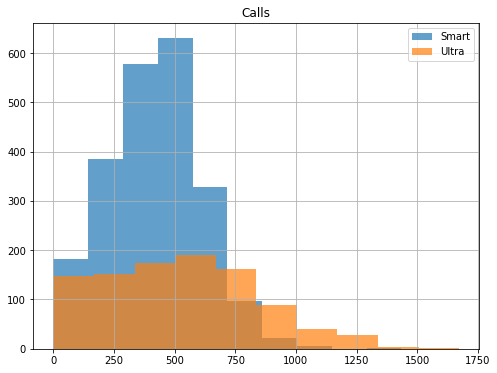

In [46]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.title('Calls')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'smart']['calls_duration'], alpha=0.7, label='Smart')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'ultra']['calls_duration'], alpha=0.7, label='Ultra')
plt.legend()
plt.show()


Вывод:
- У тарифа "Смарт" распределение похоже на нормальное. Как и ожидалось явный пик в районе 500р, что соответствует минутам, включенным в тарифный план.
- Тариф "Ультра" явно завышает включенные в пакет минуты, никто из клиентов не выговаривает даже 2000 мин. Нужно подумать об уменьшении кол-ва минут, что удешевит тариф и привлечет новых клментов. Распределение похоже на равномерное.

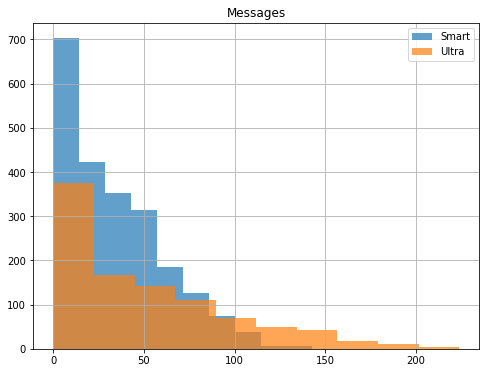

In [47]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.title('Messages')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'smart']['messages_count'], alpha=0.7, label='Smart')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'ultra']['messages_count'], alpha=0.7, label='Ultra')
plt.legend()
plt.show()

Превышение лимитов по смс у абонентов тарифа "Смарт":

In [48]:
df_users_merge[(df_users_merge['tariff'] == 'smart') & (df_users_merge['messages_count'] > 50)]['user_id'].count() / df_users_merge[df_users_merge['tariff'] == 'smart']['user_id'].count() * 100

25.3028263795424

Вывод:
- Экспоненциальное распределение
- У клиентов тарифа "Смарт" в 25% случаются превышения лимитов по смс. Возможно стоит задуматься об увеличении лимитов.
- Тарифу "Ультра" такой большой лимит по смс не нужен. Более 300 смс вообще нигому не понадобилось. Также как и в случае с минутами можно лимит уменьшить и удешевить тариф.

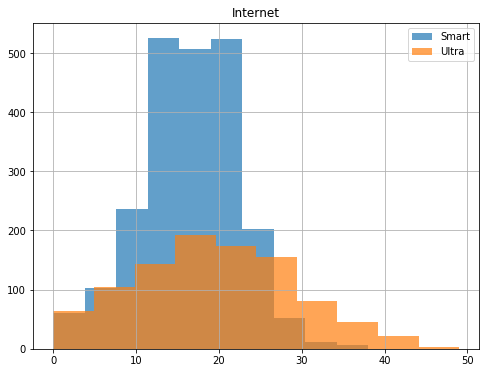

In [49]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.title('Internet')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'smart']['gb_used'], alpha=0.7, label='Smart')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'ultra']['gb_used'], alpha=0.7, label='Ultra')
plt.legend()
plt.show()

Больше интернет лимита у Смарт:

In [50]:
df_users_merge[(df_users_merge['tariff'] == 'smart') & (df_users_merge['gb_used'] > 15)]['user_id'].count() / df_users_merge[df_users_merge['tariff'] == 'smart']['user_id'].count() * 100

58.50157021085689

Больше интернет лимита у Ультра:

In [51]:
df_users_merge[(df_users_merge['tariff'] == 'ultra') & (df_users_merge['gb_used'] > 30)]['user_id'].count() / df_users_merge[df_users_merge['tariff'] == 'ultra']['user_id'].count() * 100

13.604060913705585

Вывод:
- Нормальное распределение
- У клиентов тарифа "Смарт" более боловины клиентов 58% превышают лимиты по интренету. Возможно стоит увеличить.
- Тарифу "Ультра" страдает меньше, только 13 процентов.

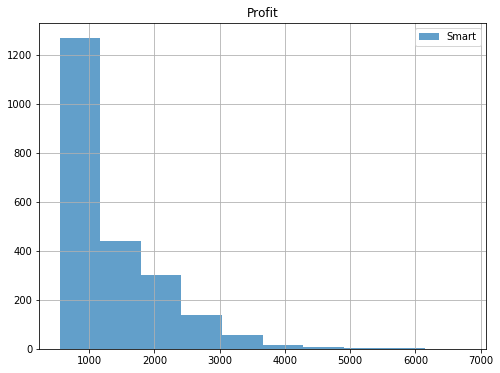

In [52]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.title('Profit')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'smart']['profit'], alpha=0.7, label='Smart')
plt.legend()
plt.show()

Вывод:
- Экспоненциальное распределение

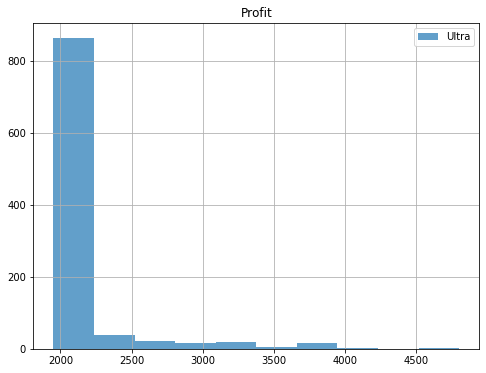

In [53]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.title('Profit')
plt.hist(df_users_merge[df_users_merge['tariff'] == 'ultra']['profit'], alpha=0.7, label='Ultra')
plt.legend()
plt.show()

### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Проведем расчет этих показателей отдельно для каждого тарифа

### Тариф "Ультра"

In [54]:
df_ultra = pd.DataFrame([
                        df_users_merge[df_users_merge['tariff'] == 'ultra'].loc[:, 'calls_duration': 'profit'].median(),
                        df_users_merge[df_users_merge['tariff'] == 'ultra'].loc[:, 'calls_duration': 'profit'].mean(),
                        np.var(df_users_merge[df_users_merge['tariff'] == 'ultra'].loc[:, 'calls_duration': 'profit'], ddof=1),
                        np.std(df_users_merge[df_users_merge['tariff'] == 'ultra'].loc[:, 'calls_duration': 'profit'], ddof=1)
                        ], 
                        index=['median', 'mean', 'var', 'std'],
                        columns=['calls_duration', 'calls_count', 'messages_count', 'gb_used', 'profit'])

    Вывод: Пользователи тарифа "Ультра" не переплачивают сверх тарифа. Из-за этого нулевые значения var и std в итоговой сводной таблице.

### Тариф "Смарт"

In [55]:
df_smart = pd.DataFrame([
                        df_users_merge[df_users_merge['tariff'] == 'smart'].loc[:, 'calls_duration': 'profit'].median(),
                        df_users_merge[df_users_merge['tariff'] == 'smart'].loc[:, 'calls_duration': 'profit'].mean(),
                        np.var(df_users_merge[df_users_merge['tariff'] == 'smart'].loc[:, 'calls_duration': 'profit'], ddof=1),
                        np.std(df_users_merge[df_users_merge['tariff'] == 'smart'].loc[:, 'calls_duration': 'profit'], ddof=1)
                        ], 
                        index=['median', 'mean', 'var', 'std'],
                        columns=['calls_duration', 'calls_count', 'messages_count', 'gb_used', 'profit'])

### Сводная таблица по тарифам

In [56]:
df_final = df_ultra.T.merge(df_smart.T, left_on=df_ultra.T.index, right_on=df_smart.T.index, how='outer')
df_final.columns = [
    'metrica',
    'ultra_median',
    'ultra_mean',
    'ultra_var',
    'ultra_std',
    'smart_median',
    'smart_mean',
    'smart_var',
    'smart_std',
]
df_final.index = [
    'calls_duration',
    'calls_count',
    'messages_count',
    'gb_used',
    'profit',
]
df_final = df_final.drop('metrica', 1)
df_final

,ultra_median,ultra_mean,ultra_var,ultra_std,smart_median,smart_mean,smart_var,smart_std
calls_duration,518.0,526.623350,100873.633397,317.606098,422.0,417.934948,36219.315784,190.313730
calls_count,58.0,59.236548,1264.707199,35.562722,47.0,46.947510,442.646705,21.039171
messages_count,38.0,49.363452,2285.266143,47.804457,28.0,33.384029,796.812958,28.227876
gb_used,19.0,19.494416,97.091686,9.853511,17.0,16.328847,33.028705,5.747061
profit,1950.0,2070.152284,141516.745079,376.187114,1023.0,1289.973531,669785.708006,818.404367


In [57]:
df_users_merge[df_users_merge['tariff'] == 'smart']['profit'].quantile(q=0.9)

2408.4

    Вывод: 90% квантиль указывает нам на то, что часть, хоть и малая, переплачивает за тариф "Смарт" почти в два раза.

In [60]:
(
 df_users_merge
 .groupby('tariff')
 [['calls_duration', 'messages_count', 'gb_used']]
 .agg(['median','mean','var','std'])
 .style.format('{:.0f}')
)

### Построение графиков

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

    Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.
    Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [58]:
fir = df_users_merge[df_users_merge['tariff'] == 'ultra']['profit'].to_list()

sec = df_users_merge[df_users_merge['tariff'] == 'smart']['profit'].to_list()

alpha = 0.05

results = st.ttest_ind(fir, sec)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
    print("Не получилось отвергнуть альтернативную гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    print("Отвергаем альтернативную гипотезу")

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу
Не получилось отвергнуть альтернативную гипотезу


    Гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются не получилось отвергнуть.

### Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

    Нулевая гипотеза: средняя выручка пользователи из Москвы равна выручке пользователей из других регионов.
    Альтернативная гипотеза: средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

In [59]:
fir = df_users_merge[df_users_merge['city'] == 'Москва']['profit']

sec = df_users_merge[df_users_merge['city'] != 'Москва']['profit']

alpha = 0.05

results = st.ttest_ind(fir, sec)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
    print("Не получилось отвергнуть альтернативную гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    print("Отвергаем альтернативную гипотезу")

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу
Отвергаем альтернативную гипотезу


    Гипотезу о том, что средняя выручка пользователи из Москвы равна выручке пользователей из других регионов не получилось отвергнуть.

    Формировал гипотезы на основе "Гипотезы о равенстве средних двух генеральных совокупностей". Нулевая гипотеза предпологала равенство двух сравниваемых компонентов, а альтернативная напротив - неравенство.
    Использовал гипотезу alpha = 0.05 - критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу


## Общий вывод

В данной проектной работе был проведен предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Было проанализировано поведение клиентов и сделан вывод — какой тариф лучше.
1.	Данные были предварительно изучены и обработаны: были устранены пропуски, данные приведены и переработаны к нужным типам и виду.
2.	Созданы сводные таблицы для помесячного анализа всех пользовательских показателей: минут, смс, интернета.
3.	Был вычислен помесячный доход, исходя из тарифа, для каждого пользователя компании.
4.	Все данные были сведены в одну таблицу для простоты анализа.
5.	Были построены графики и гистограммы сравнения всех параметров у тарифов.

Использую графическое представление данных об затратах пользователей на тариф, можно сделать, что пользователи тарифа ультра стабильно приносят больше прибыли весь год, относительно своих конкурентов.

6.	Гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются не получилось отвергнуть.
7.	Гипотезу о том, что средняя выручка пользователи из Москвы равна выручке пользователей из других регионов не получилось отвергнуть.

Можно сделать вывод, что тариф "Ультра" нуждается в переработке. У него завышенные лимиты, которые никто из пользователей не превышает. Отсюда следуюет завышенная цена. Нужно уменьшить лимиты и цену.
